<a href="https://colab.research.google.com/github/danielvieira95/danielvieira95/blob/main/Analise_de_Dados_Mestrado_20_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
# Importação de bibliotecas

In [156]:
from google.colab import files 
import io
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np


In [ ]:
upload = files.upload()

Saving 10.05.xlsx to 10.05.xlsx


In [ ]:
#Carregamento dos arquivos de dataset

In [157]:
df = pd.read_excel('/content/10.05.xlsx')
#df = pd.read_excel('/content/03.05.xlsx')
#df =pd.read_excel('/content/21.04 .xlsx') 
#df =pd.read_excel('/content/19.04 atual.xlsx') 
df = df.set_index('Hora')
df.tail(3)

,Data,p1_cont_iot_in,p1_bpc_in,p2_cont_iot_in,p2_bpc_in,p3_cont_iot_in,p3_bpc_in,p1_cont_iot_out,p1_bpc_out,p2_cont_iot_out,p2_bpc_out,p3_cont_iot_out,p3_bpc_out,tot_pas_cont_iot,tot_pas_bpc,Evento,ID dispositivo,Lat,Long,Speed,ID volta
Hora,,,,,,,,,,,,,,,,,,,,,
19:30:54,2021-05-10 00:00:00,6,6,173,175,188,189,2,1,182,183.0,183,186,0,0,Out,3,-22.815929,-47.072536,0.04,NaN
19:30:57,2021-05-10 00:00:00,6,6,173,175,188,189,2,1,182,183.0,183,186,0,0,Out,3,-22.815928,-47.072536,0.04,NaN
19:30:59,2021-05-10 00:00:00,6,6,173,175,188,189,2,1,182,183.0,183,186,0,0,Out,3,-22.815929,-47.072536,0.06,NaN


In [ ]:
df['dif'] =0
p2_cont = df['p2_cont_iot_in ']
for i in range (len(df)-1):
 df['dif'].iloc[i] = df['p2_cont_iot_in '].iloc[i+1 ] -df['p2_cont_iot_in '].iloc[i]



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['dif'].iloc[i] = df['p2_cont_iot_in '].iloc[302 ] -df['p2_cont_iot_in '].iloc[300]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
print(df['dif'])

0        0
1        0
2        0
3        0
4        0
        ..
15768    0
15769    0
15770    0
15771    0
15772    0
Name: dif, Length: 15773, dtype: int64


In [ ]:
print(df['p2_cont_iot_in '] [300])
print(df['p2_cont_iot_in '] [330])

3
3


In [ ]:
df['res'] =0
for i in range (len(df)):
  df['res'].iloc[i] = df['p2_bpc_in'].iloc[i] - df['p2_cont_iot_in '].iloc[i]
 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['new'] =0
for i in range (len(df)):
  print(df['res'].loc[i])
 # df['res']


In [ ]:
dataframenovo = df.loc [(df['res']>2) & (df['res']<4) & (df['Evento'] == 'In')]

In [ ]:
dataframenovo.tail(10)


,Data,Hora,p1_cont_iot_in,p1_bpc_in,p2_cont_iot_in,p2_bpc_in,p3_cont_iot_in,p3_bpc_in,p1_cont_iot_out,p1_bpc_out,p2_cont_iot_out,p2_bpc_out,p3_cont_iot_out,p3_bpc_out,tot_pas_cont_iot,tot_pas_bpc,Evento,ID dispositivo,Lat,Long,Speed,ID volta,res,new
13476,2021-05-10 00:00:00,17:45:12,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816704,-47.072819,0.17,NaN,3,False
13477,2021-05-10 00:00:00,17:45:15,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816710,-47.072826,0.35,NaN,3,False
13478,2021-05-10 00:00:00,17:45:17,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816710,-47.072830,0.37,NaN,3,False
13479,2021-05-10 00:00:00,17:45:20,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816711,-47.072834,0.43,NaN,3,False
13480,2021-05-10 00:00:00,17:45:23,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816713,-47.072842,0.78,NaN,3,False
13481,2021-05-10 00:00:00,17:45:24,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816715,-47.072842,0.67,NaN,3,False
13482,2021-05-10 00:00:00,17:45:28,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816717,-47.072845,0.44,NaN,3,False
13483,2021-05-10 00:00:00,17:45:29,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816719,-47.072849,0.30,NaN,3,False
13484,2021-05-10 00:00:00,17:45:33,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816719,-47.072849,0.30,NaN,3,False
13485,2021-05-10 00:00:00,17:45:35,6,6,139,142,148,150,2,1,140,146.0,146,146,5,5,In,3,-22.816719,-47.072849,0.20,NaN,3,False


In [158]:
df['dif_linha'] = 0
for i in range(len(df)-1):
  df['dif_linha'].iloc[i] = df['p2_cont_iot_in '].iloc[i+1] - df['p2_cont_iot_in '].iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [159]:
df_evento = df.loc[df['dif_linha']>0]

In [160]:
df_evento

,Data,p1_cont_iot_in,p1_bpc_in,p2_cont_iot_in,p2_bpc_in,p3_cont_iot_in,p3_bpc_in,p1_cont_iot_out,p1_bpc_out,p2_cont_iot_out,p2_bpc_out,p3_cont_iot_out,p3_bpc_out,tot_pas_cont_iot,tot_pas_bpc,Evento,ID dispositivo,Lat,Long,Speed,ID volta,dif_linha
Hora,,,,,,,,,,,,,,,,,,,,,,
07:40:18,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.829477,-47.063881,7.24,NaN,3
07:46:05,2021-05-10 00:00:00,1,1,3,3,2,2,0,0,0,0.0,3,3,3,3,Out,5,-22.821272,-47.067574,17.61,NaN,3
08:01:21,2021-05-10 00:00:00,1,1,6,9,3,2,0,0,5,5.0,4,5,1,2,Out,6,-22.816362,-47.072643,0.09,NaN,3
08:11:46,2021-05-10 00:00:00,1,1,9,12,3,2,0,0,5,5.0,8,7,0,0,Out,6,-22.816284,-47.072582,0.76,NaN,1
08:28:41,2021-05-10 00:00:00,2,2,9,12,3,2,0,0,5,5.0,8,10,1,1,In,1,-22.828476,-47.066368,18.30,NaN,5
09:20:12,2021-05-10 00:00:00,3,3,14,17,5,5,0,0,10,11.0,11,13,1,1,In,1,-22.829521,-47.063644,14.61,NaN,4
11:06:55,2021-05-10 00:00:00,4,4,18,21,5,5,1,0,14,15.0,11,14,1,1,In,1,-22.816315,-47.072659,2.93,NaN,4
11:18:21,2021-05-10 00:00:00,4,4,18,21,10,11,1,0,18,19.0,11,14,2,3,In,4,-22.828585,-47.066128,11.43,NaN,5
11:20:55,2021-05-10 00:00:00,4,4,23,25,10,11,1,0,18,19.0,11,14,7,7,In,4,-22.825079,-47.066921,1.00,NaN,6


In [ ]:
len(dataframenovo)
len(df_evento)

49

KeyError: ignored

In [172]:
df_evento['df_event_marker'] = 0 
for i in range (len (df_evento)-1):
  if (df_evento['dif_linha'].iloc[i]>3) or (df_evento['dif_linha'].iloc[i]<5) : 
   df_evento['df_event_marker'].iloc[i] = 'True'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [173]:
df_evento

,Data,p1_cont_iot_in,p1_bpc_in,p2_cont_iot_in,p2_bpc_in,p3_cont_iot_in,p3_bpc_in,p1_cont_iot_out,p1_bpc_out,p2_cont_iot_out,p2_bpc_out,p3_cont_iot_out,p3_bpc_out,tot_pas_cont_iot,tot_pas_bpc,Evento,ID dispositivo,Lat,Long,Speed,ID volta,dif_linha,df_event_marker
Hora,,,,,,,,,,,,,,,,,,,,,,,
07:40:18,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.829477,-47.063881,7.24,NaN,3,True
07:46:05,2021-05-10 00:00:00,1,1,3,3,2,2,0,0,0,0.0,3,3,3,3,Out,5,-22.821272,-47.067574,17.61,NaN,3,True
08:01:21,2021-05-10 00:00:00,1,1,6,9,3,2,0,0,5,5.0,4,5,1,2,Out,6,-22.816362,-47.072643,0.09,NaN,3,True
08:11:46,2021-05-10 00:00:00,1,1,9,12,3,2,0,0,5,5.0,8,7,0,0,Out,6,-22.816284,-47.072582,0.76,NaN,1,True
08:28:41,2021-05-10 00:00:00,2,2,9,12,3,2,0,0,5,5.0,8,10,1,1,In,1,-22.828476,-47.066368,18.30,NaN,5,True
09:20:12,2021-05-10 00:00:00,3,3,14,17,5,5,0,0,10,11.0,11,13,1,1,In,1,-22.829521,-47.063644,14.61,NaN,4,True
11:06:55,2021-05-10 00:00:00,4,4,18,21,5,5,1,0,14,15.0,11,14,1,1,In,1,-22.816315,-47.072659,2.93,NaN,4,True
11:18:21,2021-05-10 00:00:00,4,4,18,21,10,11,1,0,18,19.0,11,14,2,3,In,4,-22.828585,-47.066128,11.43,NaN,5,True
11:20:55,2021-05-10 00:00:00,4,4,23,25,10,11,1,0,18,19.0,11,14,7,7,In,4,-22.825079,-47.066921,1.00,NaN,6,True


In [ ]:
dataframe_1volta = df.iloc[0:2000]

In [ ]:
dataframe_1volta

,Data,p1_cont_iot_in,p1_bpc_in,p2_cont_iot_in,p2_bpc_in,p3_cont_iot_in,p3_bpc_in,p1_cont_iot_out,p1_bpc_out,p2_cont_iot_out,p2_bpc_out,p3_cont_iot_out,p3_bpc_out,tot_pas_cont_iot,tot_pas_bpc,Evento,ID dispositivo,Lat,Long,Speed,ID volta
Hora,,,,,,,,,,,,,,,,,,,,,
07:29:48,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816320,-47.072674,0.13,NaN
07:29:51,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816320,-47.072674,0.07,NaN
07:29:53,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816319,-47.072674,0.04,NaN
07:29:56,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816317,-47.072674,0.07,NaN
07:29:59,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816315,-47.072674,0.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09:01:53,2021-05-10 00:00:00,2,2,14,17,5,5,0,0,10,11.0,11,13,0,0,Out,6,-22.816303,-47.072716,0.04,NaN
09:01:56,2021-05-10 00:00:00,2,2,14,17,5,5,0,0,10,11.0,11,13,0,0,Out,6,-22.816303,-47.072712,0.07,NaN
09:01:58,2021-05-10 00:00:00,2,2,14,17,5,5,0,0,10,11.0,11,13,0,0,Out,6,-22.816305,-47.072708,0.07,NaN


In [ ]:
df['res'].sum()/(len(df)-1)


2.2360512300278974

In [ ]:
for i in range(len(df)):
  print(df['new'].loc[i])

A saída de streaming foi truncada nas últimas 5000 linhas.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [ ]:
print(df['new'])

0        False
1        False
2        False
3        False
4        False
         ...  
15768    False
15769    False
15770    False
15771    False
15772    False
Name: new, Length: 15773, dtype: bool


KeyError: ignored

In [ ]:
print (df['p2_cont_iot_in '][15772], df['p2_cont_iot_in '][15770])

173 173


In [ ]:
dif = df['p2_cont_iot_in '].iloc[15770]
print (dif)

173


In [ ]:
#print(df.loc[35])
#df['p2_cont_iot_in '].plot()
values = [df['p2_cont_iot_in ']-df['p2_cont_iot_in '] ]
print(values)
df_filt = 

[0        0
1        0
2        0
3        0
4        0
        ..
15767    0
15768    0
15769    0
15770    0
15771    0
Name: p2_cont_iot_in , Length: 15772, dtype: int64]


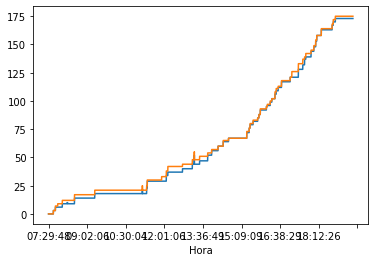

In [ ]:
df[['p2_cont_iot_in ', 'p2_bpc_in']]
df['p2_cont_iot_in '].plot()
df['p2_bpc_in'].plot()

Soma 2519
Media p2  63.961516515564576
Dif p2  Hora
07:29:48    0
07:29:51    0
07:29:53    0
07:29:56    0
07:29:59    0
           ..
19:30:49    1
19:30:51    1
19:30:54    1
19:30:57    1
19:30:59    1
Name: dif_p3, Length: 15773, dtype: int64
Residuo quadratico  6345361


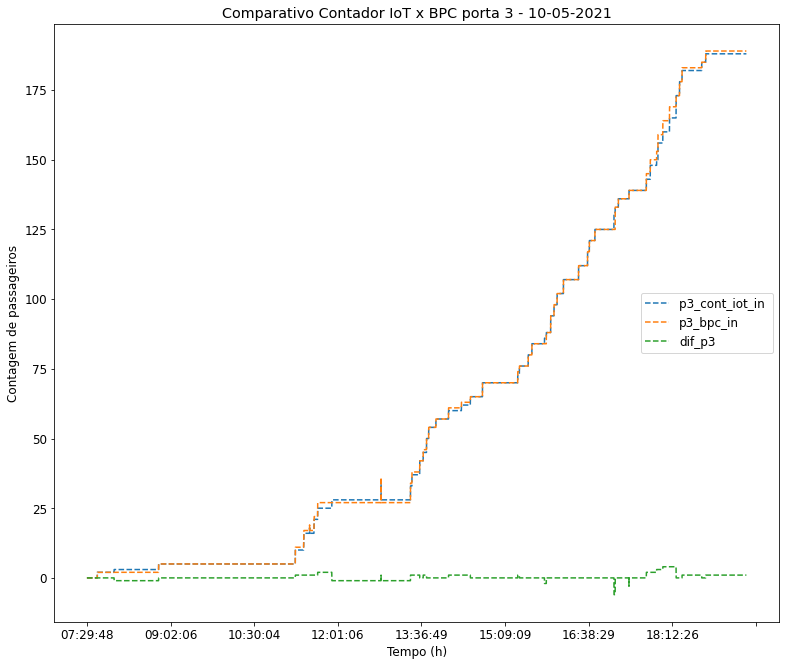

In [ ]:
df['dif_p3'] = df['p3_bpc_in'] - df['p3_cont_iot_in ']
df['squardif']= (df ['dif_p3']*df ['dif_p3'])
df['squardif'] = df['squardif']+ df['squardif']
plt.rcParams.update({'font.size':12})
plt.figure(figsize= (13,11))
df['p3_cont_iot_in '].plot(linestyle = '--')
df['p3_bpc_in'].plot(linestyle = '--')
df['dif_p3'].plot(linestyle = '--')
#dados['diferença'].plot(linestyle = '--')
#dados['diferença'].plot(color = 'green',linestyle = '--')
plt.title("Comparativo Contador IoT x BPC porta 3 - 10-05-2021")
plt.xlabel("Tempo (h)")
plt.ylabel("Contagem de passageiros")
plt.legend(loc = 'center right')
plt.savefig('Gráfico comparativo dia p3 in  10-05-2021')
soma_difp3 = df['dif_p3'].sum()
residuo_quad1 = soma_difp3* soma_difp3
media_p3 = df['p3_bpc_in'].mean()
print("Soma", soma_difp3)
print("Media p2 ", media_p3)
print("Dif p2 ", df['dif_p3'])
print("Residuo quadratico ", residuo_quad1 )


In [ ]:
df.index[600]

datetime.time(7, 56, 40)

In [ ]:
def estatistica_p2 (df):
  
  minimo_p2_cont_iot_in = df['p2_cont_iot_in '].min()
  minimo_p2_bpc_in = df['p2_bpc_in'].min()
  maximo_p2_cont_iot_in = df['p2_cont_iot_in '].max()
  maximo_p2_bpc_in = df['p2_bpc_in'].max()
  media_p2_cont_iot_in = df['p2_cont_iot_in '].mean()  
  media_p2_bpc_in = df['p2_bpc_in'].mean()  
  mediana_p2_cont_iot_in = df['p2_cont_iot_in '].median()
  mediana_p2_bpc_in = df['p2_bpc_in'].median()
  variancia_p2_cont_iot_in = df['p2_cont_iot_in '].var()
  variancia_p2_cont_iot_in = df['p2_cont_iot_in '].var()
  desvpad_p2_cont_iot_in = df['p2_cont_iot_in '].std()
  desvpad_p2_bpc_in = df['p2_bpc_in'].std()
  
  # Calculo dos parametros out
  minimo_p2_cont_iot_out = df['p2_cont_iot_out'].min()
  minimo_p2_bpc_out = df['p2_bpc_out'].min()
  maximo_p2_cont_iot_out = df['p2_cont_iot_out'].max()
  maximo_p2_bpc_out = df['p2_bpc_out'].max()
  media_p2_cont_iot_iot_out =df['p2_cont_iot_out'].mean() 
  media_p2_bpc_out = df['p2_cont_iot_out'].mean()  
  mediana_p2_cont_iot_out = df['p2_cont_iot_out'].median()
  mediana_p2_bpc_out = df['p2_bpc_out'].median()
  variancia_p2_cont_iot_out = df['p2_cont_iot_out'].var()
  variancia_p2_bpc_out = df['p2_bpc_out'].var()
  desvpad_p2_cont_iot_out = df['p2_cont_iot_out'].std()
  desvpad_p2_bpc_out = df['p2_bpc_out'].std() 

  stats_p2 =[minimo_p2_bpc_in, minimo_p2_cont_iot_in, maximo_p2_bpc_in, maximo_p2_cont_iot_in, media_p2_bpc_in, media_p2_cont_iot_in,
             mediana_p2_bpc_in, mediana_p2_cont_iot_in, variancia_p2_cont_iot_in , variancia_p2_cont_iot_in , desvpad_p2_cont_iot_in, desvpad_p2_bpc_in,
             minimo_p2_bpc_out, minimo_p2_cont_iot_out, maximo_p2_bpc_out, maximo_p2_cont_iot_out,  media_p2_bpc_out,  media_p2_cont_iot_iot_out,
             mediana_p2_bpc_out,mediana_p2_cont_iot_out, variancia_p2_bpc_out, variancia_p2_cont_iot_out, desvpad_p2_bpc_out, desvpad_p2_cont_iot_out]  
  return stats_p2 

In [ ]:
STAT = estatistica_p2(df)
print("Estatisticas porta 2 in ")
print('Minimo p2_bpc_in: {:4.2f}'.format(STAT[0]))
print('Minimo p2_cont_in: {:4.2f}'.format(STAT[1]))
print('Maximo p2_bpc_in: {:4.2f}'.format(STAT[2]))
print('Maximo p2_cont_in: {:4.2f}'.format(STAT[3]))
print('Media p2_bpc_in: {:4.2f}'.format(STAT[4]))
print('Media p2_cont_in: {:4.2f}'.format(STAT[5]))
print('Mediana p2_bpc_in: {:4.2f}'.format(STAT[6]))
print('Mediana p2_cont_in: {:4.2f}'.format(STAT[7]))
print('Variancia p2_bpc_in: {:4.2f}'.format(STAT[8]))
print('Variancia p2_cont_in: {:4.2f}'.format(STAT[9]))
print('Desvio padrao p2_bpc_in: {:4.2f}'.format(STAT[10]))
print('Desvio padrao p2_cont_in: {:4.2f}'.format(STAT[11]))



In [ ]:
STAT = estatistica_p2(df)
print("Estatisticas porta 2 out ")
print('Minimo p2_bpc_out: {:4.2f}'.format(STAT[12]))
print('Minimo p2_cont_out: {:4.2f}'.format(STAT[13]))
print('Maximo p2_bpc_out: {:4.2f}'.format(STAT[14]))
print('Maximo p2_cont_out: {:4.2f}'.format(STAT[15]))
print('Media p2_bpc_out: {:4.2f}'.format(STAT[16]))
print('Media p2_cont_out: {:4.2f}'.format(STAT[17]))
print('Mediana p2_bpc_out: {:4.2f}'.format(STAT[18]))
print('Mediana p2_cont_out: {:4.2f}'.format(STAT[19]))
print('Variancia p2_bpc_out: {:4.2f}'.format(STAT[20]))
print('Variancia p2_cont_out: {:4.2f}'.format(STAT[21]))
print('Desvio padrao p2_bpc_out: {:4.2f}'.format(STAT[22]))
print('Desvio padrao p2_cont_out: {:4.2f}'.format(STAT[23]))


In [ ]:
minimo_p2_cont_iot_out = min(df['p2_cont_iot_out'])
print(minimo_p2_cont_iot_out)

0


In [ ]:

print(df['p2_cont_iot_in '].mean() )
print(df['p2_cont_iot_in '].var() )
print(df['p2_cont_iot_in '].std() )

In [ ]:
def estatistica_p3 (df):
  
  minimo_p3_cont_iot_in = df['p3_cont_iot_in '].min()
  minimo_p3_bpc_in = df['p3_bpc_in'].min()
  maximo_p3_cont_iot_in = df['p3_cont_iot_in '].max()
  maximo_p3_bpc_in = df['p3_bpc_in'].max()
  media_p3_cont_iot_in = df['p3_cont_iot_in '].mean()  
  media_p3_bpc_in = df['p3_bpc_in'].mean()  
  mediana_p3_cont_iot_in = df['p3_cont_iot_in '].median()
  mediana_p3_bpc_in = df['p3_bpc_in'].median()
  variancia_p3_cont_iot_in = df['p3_cont_iot_in '].var()
  variancia_p3_cont_iot_in = df['p3_cont_iot_in '].var()
  desvpad_p3_cont_iot_in = df['p3_cont_iot_in '].std()
  desvpad_p3_bpc_in = df['p3_bpc_in'].std()
  
  # Calculo dos parametros out
  minimo_p3_cont_iot_out = df['p3_cont_iot_out'].min()
  minimo_p3_bpc_out = df['p3_bpc_out'].min()
  maximo_p3_cont_iot_out = df['p3_cont_iot_out'].max()
  maximo_p3_bpc_out = df['p3_bpc_out'].max()
  media_p3_cont_iot_iot_out =df['p3_cont_iot_out'].mean() 
  media_p3_bpc_out = df['p3_cont_iot_out'].mean()  
  mediana_p3_cont_iot_out = df['p3_cont_iot_out'].median()
  mediana_p3_bpc_out = df['p3_bpc_out'].median()
  variancia_p3_cont_iot_out = df['p3_cont_iot_out'].var()
  variancia_p3_bpc_out = df['p3_bpc_out'].var()
  desvpad_p3_cont_iot_out = df['p3_cont_iot_out'].std()
  desvpad_p3_bpc_out = df['p3_bpc_out'].std() 

  stats_p3 =[minimo_p3_bpc_in, minimo_p3_cont_iot_in, maximo_p3_bpc_in, maximo_p3_cont_iot_in, media_p3_bpc_in, media_p3_cont_iot_in,
             mediana_p3_bpc_in, mediana_p3_cont_iot_in, variancia_p3_cont_iot_in , variancia_p3_cont_iot_in , desvpad_p3_cont_iot_in, desvpad_p3_bpc_in,
             minimo_p3_bpc_out, minimo_p3_cont_iot_out, maximo_p3_bpc_out, maximo_p3_cont_iot_out,  media_p3_bpc_out,  media_p3_cont_iot_iot_out,
             mediana_p3_bpc_out,mediana_p3_cont_iot_out, variancia_p3_bpc_out, variancia_p3_cont_iot_out, desvpad_p3_bpc_out, desvpad_p3_cont_iot_out]  
  return stats_p3

In [ ]:
# Estatisticas tot_cont_iot

In [ ]:
def estatistica_tot_pas_tot_bpc(df):
  minimo_tot_cont_iot = df['tot_pas_cont_iot'].min()
  minimo_tot_bpc = df['tot_pas_bpc'].min()
  maximo_tot_cont_iot = df['tot_pas_cont_iot'].max()
  maximo_tot_bpc= df['tot_pas_bpc'].max()
  media_tot_cont_iot = df['tot_pas_cont_iot'].mean()  
  media_tot_bpc = df['tot_pas_bpc'].mean()  
  mediana_tot_cont_iot = df['tot_pas_cont_iot'].median()
  mediana_tot_bpc = df['tot_pas_bpc'].median()
  variancia_tot_cont_iot = df['tot_pas_cont_iot'].var()
  variancia_tot_bpc = df['tot_pas_bpc'].var()
  desvpad_tot_cont_iot = df['tot_pas_cont_iot'].std()
  desvpad_tot_bpc = df['tot_pas_bpc'].std()
  stats_tot_cont_iot_bpc = [minimo_tot_bpc, minimo_tot_cont_iot, maximo_tot_bpc, maximo_tot_cont_iot, media_tot_bpc, media_tot_cont_iot, mediana_tot_bpc, mediana_tot_cont_iot, 
                            variancia_tot_bpc, variancia_tot_cont_iot, desvpad_tot_bpc, desvpad_tot_cont_iot]
  return  stats_tot_cont_iot_bpc

In [ ]:
STAT = estatistica_p3(df)
print("Estatisticas porta 3 in ")
print('Minimo p3_bpc_in: {:4.2f}'.format(STAT[0]))
print('Minimo p3_cont_in: {:4.2f}'.format(STAT[1]))
print('Maximo p3_bpc_in: {:4.2f}'.format(STAT[2]))
print('Maximo p3_cont_in: {:4.2f}'.format(STAT[3]))
print('Media p3_bpc_in: {:4.2f}'.format(STAT[4]))
print('Media p3_cont_in: {:4.2f}'.format(STAT[5]))
print('Mediana p3_bpc_in: {:4.2f}'.format(STAT[6]))
print('Mediana p3_cont_in: {:4.2f}'.format(STAT[7]))
print('Variancia p3_bpc_in: {:4.2f}'.format(STAT[8]))
print('Variancia p3_cont_in: {:4.2f}'.format(STAT[9]))
print('Desvio padrao p3_bpc_in: {:4.2f}'.format(STAT[10]))
print('Desvio padrao p3_cont_in: {:4.2f}'.format(STAT[11]))


In [ ]:
STAT = estatistica_p3(df)
print("Estatisticas porta 3 out ")
print('Minimo p3_bpc_out: {:4.2f}'.format(STAT[12]))
print('Minimo p3_cont_out: {:4.2f}'.format(STAT[13]))
print('Maximo p3_bpc_out: {:4.2f}'.format(STAT[14]))
print('Maximo p3_cont_out: {:4.2f}'.format(STAT[15]))
print('Media p3_bpc_out: {:4.2f}'.format(STAT[16]))
print('Media p3_cont_out: {:4.2f}'.format(STAT[17]))
print('Mediana p3_bpc_out: {:4.2f}'.format(STAT[18]))
print('Mediana p3_cont_out: {:4.2f}'.format(STAT[19]))
print('Variancia p3_bpc_out: {:4.2f}'.format(STAT[20]))
print('Variancia p3_cont_out: {:4.2f}'.format(STAT[21]))
print('Desvio padrao p3_bpc_out: {:4.2f}'.format(STAT[22]))
print('Desvio padrao p3_cont_out: {:4.2f}'.format(STAT[23]))

In [ ]:
STAT = estatistica_tot_pas_tot_bpc (df)
print("Estatisticas tot_cont_iot e tot_bpc ")
print('Minimo tot_bpc: {:4.2f}'.format(STAT[0]))
print('Minimo tot_cont_iot: {:4.2f}'.format(STAT[1]))
print('Maximo tot_bpc: {:4.2f}'.format(STAT[2]))
print('Maximo tot_cont_iot: {:4.2f}'.format(STAT[3]))
print('Media tot_bpc: {:4.2f}'.format(STAT[4]))
print('Media tot_cont_iot: {:4.2f}'.format(STAT[5]))
print('Mediana tot_bpc: {:4.2f}'.format(STAT[6]))
print('Mediana tot_cont_iot: {:4.2f}'.format(STAT[7]))
print('Variancia tot_bpc: {:4.2f}'.format(STAT[8]))
print('Variancia tot_cont_iot: {:4.2f}'.format(STAT[9]))
print('Desvio padrao tot_bpc: {:4.2f}'.format(STAT[10]))
print('Desvio padrao tot_cont_iot: {:4.2f}'.format(STAT[11]))

In [ ]:
#Calculo de residuos por porta

In [ ]:
for index, linha in df.iterrows():
   if (linha["p2_bpc_in"]- linha["p2_cont_iot_in "]>0):
       print(df,linha["p2_cont_iot_in "], ["p2_bpc_in"],dif_p2_in)
   

In [ ]:
dif_p2_list =[]

for index, linha in df.iterrows():
   dif_p2_in = linha["p2_bpc_in"]- linha["p2_cont_iot_in "]
   print(df,linha["p2_cont_iot_in "], ["p2_bpc_in"],dif_p2_in)
dif_p2_in.plot()
   


In [ ]:
soma =0
dif_p2_in = df['p2_bpc_in'] - df['p2_cont_iot_in ']
mult = np.float_power(dif_p2_in,2)  
soma = soma + mult
div = soma /(15773-1)
print(dif_p2_in)
#print(mult)
print(soma)
print(div)

In [ ]:
soma =0
dif_p2_out = df['p2_bpc_out'] - df['p2_cont_iot_out']
mult = np.float_power(dif_p2_out,2)
soma = soma + mult
div = soma /len(df)
print(dif_p2_out)
print(mult)
print(soma)
print("Residuo medio quadrático p2_out: ", div)

Hora
07:29:48    0.0
07:29:51    0.0
07:29:53    0.0
07:29:56    0.0
07:29:59    0.0
           ... 
19:30:49    1.0
19:30:51    1.0
19:30:54    1.0
19:30:57    1.0
19:30:59    1.0
Length: 15772, dtype: float64
Hora
07:29:48    0.0
07:29:51    0.0
07:29:53    0.0
07:29:56    0.0
07:29:59    0.0
           ... 
19:30:49    1.0
19:30:51    1.0
19:30:54    1.0
19:30:57    1.0
19:30:59    1.0
Length: 15772, dtype: float64
Hora
07:29:48    0.0
07:29:51    0.0
07:29:53    0.0
07:29:56    0.0
07:29:59    0.0
           ... 
19:30:49    1.0
19:30:51    1.0
19:30:54    1.0
19:30:57    1.0
19:30:59    1.0
Length: 15772, dtype: float64
Residuo medio quadrático p2_out:  Hora
07:29:48    0.000000
07:29:51    0.000000
07:29:53    0.000000
07:29:56    0.000000
07:29:59    0.000000
              ...   
19:30:49    0.000063
19:30:51    0.000063
19:30:54    0.000063
19:30:57    0.000063
19:30:59    0.000063
Length: 15772, dtype: float64


In [ ]:
dif_p3_in = df['p3_bpc_in'] - df['p3_cont_iot_in ']
mult = np.float_power(dif_p3_in,2)
soma = soma + mult
div = soma /(15773-1)
#print(mult)
print(soma)
print(div)

Hora
07:29:48     0.0
07:29:51     0.0
07:29:53     0.0
07:29:56     0.0
07:29:59     0.0
            ... 
19:30:51    42.0
19:30:54    42.0
19:30:57    42.0
19:30:59    42.0
0            NaN
Length: 15773, dtype: float64
Hora
07:29:48    0.000000
07:29:51    0.000000
07:29:53    0.000000
07:29:56    0.000000
07:29:59    0.000000
              ...   
19:30:51    0.002663
19:30:54    0.002663
19:30:57    0.002663
19:30:59    0.002663
0                NaN
Length: 15773, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:3522: RuntimeWarning: '<' not supported between instances of 'int' and 'datetime.time', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [ ]:
#filtrando linhas por evento

In [ ]:
for index, linha in df.iterrows():
   if (linha['p2_bpc_in']- linha['p2_cont_iot_in ']>0):
      novodf = linha
#df.index

In [ ]:
df_mask = df['']
print(df_mask)

KeyError: ignored

In [ ]:
print(df['p2_cont_iot_in '][100])

0


In [ ]:
print(df['p2_cont_iot_in '][10001])

44


In [ ]:
print(df['p1_bpc_in'][20],df['p1_bpc_in'][19])

1 1


In [ ]:
df.index[0]

datetime.time(7, 29, 48)

In [ ]:
novodf

Data                2021-04-19 00:00:00
p1_cont_iot_in                        6
p1_bpc_in                             6
p2_cont_iot_in                       44
p2_bpc_in                            48
p3_cont_iot_in                       33
p3_bpc_in                            34
p1_cont_iot _out                      2
p1_bpc_out                            1
p2_cont_iot_out                      43
p2_bpc_out                           44
p3_cont_iot_out                      36
p3_bpc_out                           38
tot_pas_cont_iot                      2
tot_pas_bpc                           5
Evento                               In
ID dispositivo                        3
Lat                            -22.8159
Long                           -47.0725
Speed                              0.06
ID volta                            NaN
dif                                   0
Name: 19:30:59, dtype: object

In [ ]:
dif_p3_out = df['p3_bpc_out'] - df['p3_cont_iot_out']
mult = np.float_power(dif_p3_out,2)
soma = soma + mult
div = soma /(15773-1)
print('Soma do erro ')
print(dif_p3_out)
print(mult.sum())
print('Diferenca na porta 3 ')
print(dif_p3_out)
print(mult)
print(soma)
print(div)
df_dif_p3out= dif_p3_out


Soma do erro 
Hora
07:29:48    0
07:29:51    0
07:29:53    0
07:29:56    0
07:29:59    0
           ..
19:30:49    2
19:30:51    2
19:30:54    2
19:30:57    2
19:30:59    2
Length: 15772, dtype: int64
91892.0
Diferenca na porta 3 
Hora
07:29:48    0
07:29:51    0
07:29:53    0
07:29:56    0
07:29:59    0
           ..
19:30:49    2
19:30:51    2
19:30:54    2
19:30:57    2
19:30:59    2
Length: 15772, dtype: int64
Hora
07:29:48    0.0
07:29:51    0.0
07:29:53    0.0
07:29:56    0.0
07:29:59    0.0
           ... 
19:30:49    4.0
19:30:51    4.0
19:30:54    4.0
19:30:57    4.0
19:30:59    4.0
Length: 15772, dtype: float64
Hora
07:29:48     0.0
07:29:51     0.0
07:29:53     0.0
07:29:56     0.0
07:29:59     0.0
            ... 
19:30:49    41.0
19:30:51    41.0
19:30:54    41.0
19:30:57    41.0
19:30:59    41.0
Length: 15772, dtype: float64
Hora
07:29:48    0.0000
07:29:51    0.0000
07:29:53    0.0000
07:29:56    0.0000
07:29:59    0.0000
             ...  
19:30:49    0.0026
19:30:51   

In [ ]:
df.iloc [0:400, 3:7]
shape_before = df.shape[0]
df['dif_p2_in'] = df['p2_bpc_in']- df['p2_cont_iot_in ']

df_trat= df.drop_duplicates()

In [ ]:
df['p2_cont_iot_in '].unique()
df['p2_bpc_in'].unique()
df['p3_cont_iot_in '].unique()

array([ 0,  2,  3,  5, 10, 11, 12, 13, 14, 15, 16, 18, 17, 19, 20, 21, 25,
       28, 35, 33, 37])

In [ ]:
df.head(5)
df.drop('ID volta',axis =1, inplace = True)

In [ ]:
df_dif_p3out= dif_p3_out
df_dif_p3out

Hora
07:29:48    0
07:29:51    0
07:29:53    0
07:29:56    0
07:29:59    0
           ..
19:30:49    2
19:30:51    2
19:30:54    2
19:30:57    2
19:30:59    2
Length: 15772, dtype: int64

In [ ]:
df_evento= df['p2_cont_iot_in '].diff() >0

In [ ]:
df_evento.head(600)

Hora
07:29:48    False
07:29:51    False
07:29:53    False
07:29:56    False
07:29:59    False
            ...  
07:56:27    False
07:56:30    False
07:56:32    False
07:56:35    False
07:56:37    False
Name: p2_cont_iot_in , Length: 600, dtype: bool

In [ ]:
df.tail()
df.drop_duplicates(subset='p2_cont_iot_in ', keep = 'first')
df.drop_duplicates(subset='p2_bpc_in', keep = 'first')
df.drop_duplicates(subset='p3_cont_iot_in ', keep = 'first')
df.drop_duplicates(subset='p3_bpc_in', keep = 'first', )
df.drop_duplicates(subset='p2_cont_iot_out', keep = 'first')
df.drop_duplicates(subset='p2_bpc_out', keep = 'first')
df_new = df

In [ ]:
df.head(50)

,Data,p1_cont_iot_in,p1_bpc_in,p2_cont_iot_in,p2_bpc_in,p3_cont_iot_in,p3_bpc_in,p1_cont_iot_out,p1_bpc_out,p2_cont_iot_out,p2_bpc_out,p3_cont_iot_out,p3_bpc_out,tot_pas_cont_iot,tot_pas_bpc,Evento,ID dispositivo,Lat,Long,Speed,ID volta
Hora,,,,,,,,,,,,,,,,,,,,,
07:29:48,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816320,-47.072674,0.13,NaN
07:29:51,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816320,-47.072674,0.07,NaN
07:29:53,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816319,-47.072674,0.04,NaN
07:29:56,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816317,-47.072674,0.07,NaN
07:29:59,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816315,-47.072674,0.22,NaN
07:30:00,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816315,-47.072674,0.26,NaN
07:30:04,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816311,-47.072670,0.15,NaN
07:30:05,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816311,-47.072670,0.06,NaN
07:30:09,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816307,-47.072666,0.15,NaN


In [ ]:
df['dif_p2_cont_iot_in'] = df['p2_cont_iot_in '].diff()
df['dif_p2_bpc_in'] = df['p2_bpc_in'].diff()
df['dif_p3_cont_iot_in'] = df['p3_cont_iot_in '].diff()
df['dif_p3_bpc_in'] = df['p3_bpc_in'].diff()
df['dif_p2_cont_iot_out'] = df['p2_cont_iot_out'].diff()
df['dif_p2_bpc_out'] = df['p2_bpc_out'].diff()
df['dif_p3_cont_iot_out'] = df['p3_cont_iot_out'].diff()
df['dif_p3_bpc_out'] = df['p3_bpc_out'].diff()

if (df['dif_p2_cont_iot_in'] |df['dif_p2_bpc_in'] | df['dif_p3_cont_iot_in']|df['dif_p3_bpc_in'] |df['dif_p2_cont_iot_out'] |df['dif_p2_bpc_out'] | df['dif_p3_cont_iot_out'] |df['dif_p3_bpc_out'] ):
   evento =


TypeError: ignored

In [ ]:
df.head(678)

,Data,p1_cont_iot_in,p1_bpc_in,p2_cont_iot_in,p2_bpc_in,p3_cont_iot_in,p3_bpc_in,p1_cont_iot_out,p1_bpc_out,p2_cont_iot_out,p2_bpc_out,p3_cont_iot_out,p3_bpc_out,tot_pas_cont_iot,tot_pas_bpc,Evento,ID dispositivo,Lat,Long,Speed,ID volta
Hora,,,,,,,,,,,,,,,,,,,,,
07:29:48,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816320,-47.072674,0.13,NaN
07:29:51,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816320,-47.072674,0.07,NaN
07:29:53,2021-05-10 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,False,0,-22.816319,-47.072674,0.04,NaN
07:29:56,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816317,-47.072674,0.07,NaN
07:29:59,2021-05-10 00:00:00,1,1,0,0,0,0,0,0,0,0.0,0,0,1,1,In,1,-22.816315,-47.072674,0.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07:59:47,2021-05-10 00:00:00,1,1,6,9,3,2,0,0,5,5.0,4,5,1,2,Out,6,-22.816565,-47.072800,0.19,NaN
07:59:49,2021-05-10 00:00:00,1,1,6,9,3,2,0,0,5,5.0,4,5,1,2,Out,6,-22.816565,-47.072803,0.37,NaN
07:59:52,2021-05-10 00:00:00,1,1,6,9,3,2,0,0,5,5.0,4,5,1,2,Out,6,-22.816563,-47.072800,0.09,NaN
